# Analysis of recipes from the site Еда: https://eda.ru/recepty

# Step 0: Parsing

Firstly, we need to collect the data for further analysis. Information about recipes from the site "Еда" will be parsed by going through <b>100 pages</b>. On each page there are 14 recipes displayed. In total we get <b>1400 recepies</b>. We will save the following characteristics:
- `name of the recipe`
- `name of recipe's author`
- `the amount of ingredients required to cook the dish from the recipe`
- `the amount of portions the recipe suggests`
- `time needed to cook the dish from the recipe`
- `amount of times the recipe has been saved`
- `amount of times the recipe has been liked `
- `amount of times the recipe has been disliked`

Let's start by importing the libraries required for parsing:

In [ ]:
from bs4 import BeautifulSoup
import requests

Creating a function which downloads the page, configures the encoding and turns to `BeautifulSoup`:

In [ ]:
def get_soup_by_url(current_url):
    page = requests.get(current_url)
    page.encoding = 'utf-8'
    soup = BeautifulSoup(page.text, 'html.parser')
    return soup

Creating a dictionary where all the data will be saved:

In [ ]:
data = {'recipe': [], 'author': [], 'ingredients': [], 'portions': [], 'time': [], 'savings': [], 'likes': [], 'dislikes': []}

Now we can finally start collecting data from each page by using "for" loops:

In [ ]:
for page_number in range(1, 101):
    current_url = f'https://eda.ru/recepty?page={page_number}'
    soup = get_soup_by_url(current_url)

    for i in soup.find_all('span', {'class':'emotion-1bs2jj2'}):
        data['recipe'].append(i.text) # names of recepies

    for i in soup.find_all('button', {'class':'emotion-d6nx0p'}, type="button"):
        data['ingredients'].append(i.text.split()[0]) # amount of ingredients required

    for i in soup.find_all('span', {'class':'emotion-14tqfr'}, title=""):
        data['author'].append(i.text.split(': ')[1]) # author names

    for i in soup.find_all('span', {'class':'emotion-tqfyce'}, title=""):
        data['portions'].append(i.text.split()[0]) # amounts of portions

    for i in soup.find_all('span', {'class':'emotion-14gsni6'}, title=""):
        data['time'].append(i.text) # amount of time you'll spend cooking

    n = 0
    for i in soup.find_all('span', {'class':'emotion-71sled'}, title=""):
        if i.text.isdigit():
            n += 1
            if n % 3 == 1:
                data['savings'].append(i.text) # amout of times the recipe's been saved
            elif n % 3 == 2:
                data['likes'].append(i.text) # amout of times the recipe's been liked
            else:
                data['dislikes'].append(i.text) # # amout of times the recipe's been disliked

Done! Now let's create a dataframe from the dictionary and display the top-10 rows of it:

In [ ]:
df = pd.DataFrame(data)
df.head(10)

,recipe,author,ingredients,portions,time,savings,likes,dislikes
0,Брауни (brownie),Anastasia Sheveleva,6,6,40 минут,27871,3158,260
1,Сырники из творога,Алексей Скобелев,5,2,30 минут,27791,3044,310
2,Спагетти карбонара со сливками,Алексей Зимин,10,4,20 минут,23808,2493,245
3,Классическая шарлотка,Татьяна,6,12,50 минут,20833,2098,252
4,Лазанья классическая с мясом,Maria Chumakovskaya,8,6,40 минут,21169,1743,180
5,Курица «Пикассо»,naomi,15,4,45 минут,19220,1406,161
6,Американский тыквенный пирог с корицей,Дима,9,8,2 часа,17466,1399,174
7,Тонкие блины на молоке,Настасья Бондарева,6,4,40 минут,16787,1945,342
8,Азу по-татарски,Галина Хафизова,7,4,30 минут,15752,1210,97
9,"Салат из красной фасоли с творожным сыром, кра...",Алексей Зимин,9,4,7 минут,15230,1174,120


Saving the data to a `csv` file:

In [ ]:
df.to_csv('Recipes.csv', index=False, encoding='utf-8')

Now we can move to preprocessing our data :)

<h2>Step 1: Preprocessing</h2>  

Start with importing all the necessary libraries:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Open our final dataset as a `csv` file:

In [ ]:
df = pd.read_csv('Recipes.csv', encoding='utf-8')
df

,recipe,author,ingredients,portions,time,savings,likes,dislikes
0,Брауни (brownie),Anastasia Sheveleva,6,6,40 минут,27871,3158,260
1,Сырники из творога,Алексей Скобелев,5,2,30 минут,27791,3044,310
2,Спагетти карбонара со сливками,Алексей Зимин,10,4,20 минут,23808,2493,245
3,Классическая шарлотка,Татьяна,6,12,50 минут,20833,2098,252
4,Лазанья классическая с мясом,Maria Chumakovskaya,8,6,40 минут,21169,1743,180
...,...,...,...,...,...,...,...,...
1395,Спагетти болоньезе,Еда,17,8,2 часа,709,32,4
1396,Дьявольские яйца со вкусом карбонары,Еда,8,10,20 минут,729,19,2
1397,Свинина по-милански,Еда,25,4,1 час,11,5,0
1398,Тартар из авокадо с икрой воблы,Еда,4,1,5 минут,11,1,0


At first glance, we can see <b>1400</b>  rows with 8 columns (8 variables).

Our <u>variables</u>:

- <b>recipe</b>  - str, name of the recipe
- <b>author</b>  - str, name of the author
- <b>ingredients</b>  - str, number of ingredients
- <b>likes</b>  - str, number of likes
- <b>dislikes</b>  - str, number of likes
- <b>savings</b>  - str, number of saved recipes

For further analysis we start with changing the data format of our 'time' variable.

<h3>1.1. Creating the column "time"</h3>

Creating the column "time" so that it has a numeric format that can help us in further analysis:

In [ ]:
# function to convert time to minutes
def convert_to_minutes(time_str):
    total_minutes = 0
    parts = time_str.split()

    for i in range(len(parts)):
        if 'час' in parts[i]:
            hours = int(parts[i-1])
            total_minutes += hours * 60
        elif 'минут' in parts[i]:
            minutes = int(parts[i-1])
            total_minutes += minutes

    return total_minutes

df['time_in_minutes'] = df['time'].apply(convert_to_minutes).astype(int)
print(df)


                                    recipe               author  ingredients  \
0                         Брауни (brownie)  Anastasia Sheveleva            6   
1                       Сырники из творога     Алексей Скобелев            5   
2           Спагетти карбонара со сливками        Алексей Зимин           10   
3                    Классическая шарлотка              Татьяна            6   
4             Лазанья классическая с мясом  Maria Chumakovskaya            8   
...                                    ...                  ...          ...   
1395                    Спагетти болоньезе                  Еда           17   
1396  Дьявольские яйца со вкусом карбонары                  Еда            8   
1397                   Свинина по-милански                  Еда           25   
1398       Тартар из авокадо с икрой воблы                  Еда            4   
1399      Мини-чебуреки с ягненком и карри                  Еда           20   

      portions      time  savings  like

Now time is presented only in minutes.

<h3> 1.2. String columns to numeric columns</h3>

We can see that all our variables were parsed as object ones, but for further work we change the formats of some variables to the numeric:




In [ ]:
def to_int_column(column):
  return pd.to_numeric(column, errors='coerce')

for col in ['ingredients', 'portions', 'savings', 'likes', 'dislikes']:
    df[col] = to_int_column(df[col])

print(df)

                                    recipe               author  ingredients  \
0                         Брауни (brownie)  Anastasia Sheveleva            6   
1                       Сырники из творога     Алексей Скобелев            5   
2           Спагетти карбонара со сливками        Алексей Зимин           10   
3                    Классическая шарлотка              Татьяна            6   
4             Лазанья классическая с мясом  Maria Chumakovskaya            8   
...                                    ...                  ...          ...   
1395                    Спагетти болоньезе                  Еда           17   
1396  Дьявольские яйца со вкусом карбонары                  Еда            8   
1397                   Свинина по-милански                  Еда           25   
1398       Тартар из авокадо с икрой воблы                  Еда            4   
1399      Мини-чебуреки с ягненком и карри                  Еда           20   

      portions      time  savings  like

Let's look at our variables more closely:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   recipe           1400 non-null   object
 1   author           1400 non-null   object
 2   ingredients      1400 non-null   int64 
 3   portions         1400 non-null   int64 
 4   time             1400 non-null   object
 5   savings          1400 non-null   int64 
 6   likes            1400 non-null   int64 
 7   dislikes         1400 non-null   int64 
 8   time_in_minutes  1400 non-null   int32 
dtypes: int32(1), int64(5), object(3)
memory usage: 93.1+ KB


All columns are now in the right type!

<h3>1.3. The analysis of gaps </h3>

Conducting an analysis of gaps:

In [ ]:
print(df.isnull().sum())

recipe             0
author             0
ingredients        0
portions           0
time               0
savings            0
likes              0
dislikes           0
time_in_minutes    0
dtype: int64


We can see that no gap processing is needed, as there are no gaps.

<h3> 1.4. Checking duplicates </h3>


Let's check our data for duplicates and remove them if necessary:

In [ ]:
duplicates = df.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Дубликаты удалены.")

Количество дубликатов: 0


We do not have duplicates so we can continue our analysis.

<h3> 1.5. Processing outliers for each variable </h3>
Now we move on with the analysis and start processing outliers for each variable:

- Outliers for <b> `ingredients` </b> variable

In [ ]:
Q1 = df['ingredients'].quantile(0.25)
Q3 = df['ingredients'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['ingredients'] < lower_bound) | (df['ingredients'] > upper_bound)]
print(f"Выбросы в 'ingredients':\n{outliers}")

Выбросы в 'ingredients':
                                recipe         author  ingredients  portions  \
142                             Мусака  Алексей Зимин           25        12   
270     Тартар из говядины с каперсами  Алексей Зимин           26         5   
416                              Гамбо            Еда           22         8   
433                       Смёргосторта            Еда           25         6   
463                 Чикен тикка-масала            Еда           22         4   
464                         Джамбалайя            Еда           22         8   
559                     Мясная солянка            Еда           22        10   
573                   Тарелка паштетов            Еда           24         8   
616                              Бигос            Еда           22        10   
697                  Черниговский борщ            Еда           22        10   
805   Индейка с чатни из хурмы и груши            Еда           23         4   
825   Свичкова 

In [ ]:
df[(df['ingredients'] < lower_bound) | (df['ingredients'] > upper_bound)].count()

recipe             19
author             19
ingredients        19
portions           19
time               19
savings            19
likes              19
dislikes           19
time_in_minutes    19
dtype: int64

There are 19 outliers for 'ingredients'.

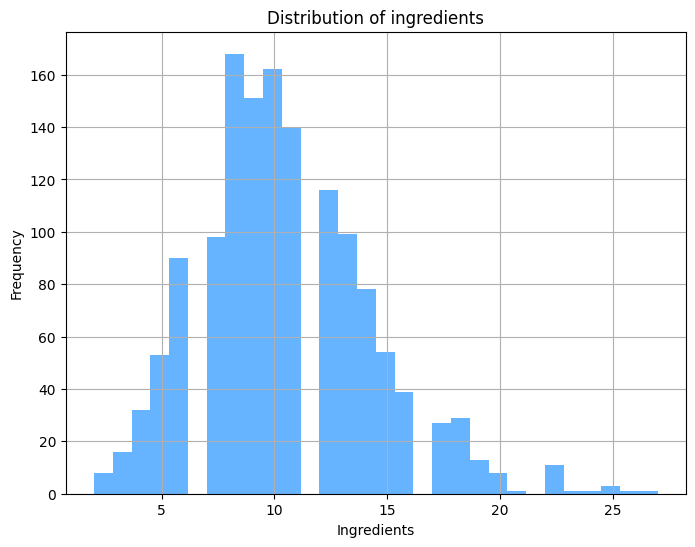

In [ ]:
plt.figure(figsize=(8, 6))
df.ingredients.hist(bins=30, color='#66b3ff')
plt.title('Distribution of ingredients')
plt.xlabel('Ingredients')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### The diagram is a histogram showing the distribution of the number of ingredients in recipes. The histogram shows that most recipes contain between 7 and 12 ingredients. The distribution is positively (right) skewed, meaning there are a few recipes with significantly more ingredients than the majority. The peak of the distribution is around 8-10 ingredients.

As we want to find the ideal recipe it is better not to include recipes with a lot of ingredients and with a small number of ingredients.


Removing outliers:

In [ ]:
df = df[(df['ingredients'] > lower_bound) & (df['ingredients'] < upper_bound)]
df

,recipe,author,ingredients,portions,time,savings,likes,dislikes,time_in_minutes
0,Брауни (brownie),Anastasia Sheveleva,6,6,40 минут,27871,3158,260,40
1,Сырники из творога,Алексей Скобелев,5,2,30 минут,27791,3044,310,30
2,Спагетти карбонара со сливками,Алексей Зимин,10,4,20 минут,23808,2493,245,20
3,Классическая шарлотка,Татьяна,6,12,50 минут,20833,2098,252,50
4,Лазанья классическая с мясом,Maria Chumakovskaya,8,6,40 минут,21169,1743,180,40
...,...,...,...,...,...,...,...,...,...
1394,Рождественское полено,Алексей Зимин,13,6,50 минут,735,6,3,50
1395,Спагетти болоньезе,Еда,17,8,2 часа,709,32,4,120
1396,Дьявольские яйца со вкусом карбонары,Еда,8,10,20 минут,729,19,2,20
1398,Тартар из авокадо с икрой воблы,Еда,4,1,5 минут,11,1,0,5


Now we have <b> 1381 </b> recipes.

- Outliers for <b> `portions` </b> variable

In [ ]:
# analysis and processing of outliers (for 'portions')

Q1 = df['portions'].quantile(0.25)
Q3 = df['portions'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['portions'] < lower_bound) | (df['portions'] > upper_bound)]
print(f"Выбросы в 'portions':\n{outliers}")


Выбросы в 'portions':
                                      recipe           author  ingredients  \
36              Традиционный торт «Наполеон»  Yulia Chilikina            8   
84                     Паппарделле болоньезе    Алексей Зимин           15   
441                          Настоящий харчо              Еда           17   
484                                 Чебуреки              Еда            7   
491                  Печенье с предсказанием              Еда            5   
521                Дрёммар («печенье мечты»)              Еда            6   
564                           Грибной паштет              Еда           12   
578                        Плов «Чайханский»    Алексей Зимин           10   
639                                 Ватрушки              Еда           10   
703               Домашняя пицца «Маргарита»              Еда            9   
725                             Скландраусис              Еда           10   
741                                    Сам

In [ ]:
df[(df['portions'] < lower_bound) | (df['portions'] > upper_bound)].count()

recipe             37
author             37
ingredients        37
portions           37
time               37
savings            37
likes              37
dislikes           37
time_in_minutes    37
dtype: int64

There are 36 outliers for 'portions'.

We delete our outliers as we are not considering the largest and the smallest portions.

In [ ]:
Q1 = df['portions'].quantile(0.25)
Q3 = df['portions'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['portions'] > lower_bound) & (df['portions'] < upper_bound)]
df

,recipe,author,ingredients,portions,time,savings,likes,dislikes,time_in_minutes
0,Брауни (brownie),Anastasia Sheveleva,6,6,40 минут,27871,3158,260,40
1,Сырники из творога,Алексей Скобелев,5,2,30 минут,27791,3044,310,30
2,Спагетти карбонара со сливками,Алексей Зимин,10,4,20 минут,23808,2493,245,20
3,Классическая шарлотка,Татьяна,6,12,50 минут,20833,2098,252,50
4,Лазанья классическая с мясом,Maria Chumakovskaya,8,6,40 минут,21169,1743,180,40
...,...,...,...,...,...,...,...,...,...
1394,Рождественское полено,Алексей Зимин,13,6,50 минут,735,6,3,50
1395,Спагетти болоньезе,Еда,17,8,2 часа,709,32,4,120
1396,Дьявольские яйца со вкусом карбонары,Еда,8,10,20 минут,729,19,2,20
1398,Тартар из авокадо с икрой воблы,Еда,4,1,5 минут,11,1,0,5


Now we have <b> 1341 </b> recipes.

- Outliers for <b> `savings` </b> variable

In [ ]:
# analysis and processing of outliers (for 'savings')

Q1 = df['savings'].quantile(0.25)
Q3 = df['savings'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['savings'] < lower_bound) | (df['savings'] > upper_bound)]
print(f"Выбросы в 'savings':\n{outliers}")


Выбросы в 'savings':
                                                 recipe               author  \
0                                      Брауни (brownie)  Anastasia Sheveleva   
1                                    Сырники из творога     Алексей Скобелев   
2                        Спагетти карбонара со сливками        Алексей Зимин   
3                                 Классическая шарлотка              Татьяна   
4                          Лазанья классическая с мясом  Maria Chumakovskaya   
...                                                 ...                  ...   
1303                         Булочки с корицей синнабон         Роман Лукшин   
1315               Пудинг творожный с изюмом и яблоками         Кира Аветова   
1348                        Фунчоза с курицей и овощами          Sveta Shalu   
1359                                               Безе         Оля Киселева   
1362  Жареный картофель с оливками и лимоном по‑маро...         Ольга Худина   

      ingredients 

In [ ]:
df[(df['savings'] < lower_bound) | (df['savings'] > upper_bound)].count()
# there are 172 outliers for 'savings'

recipe             172
author             172
ingredients        172
portions           172
time               172
savings            172
likes              172
dislikes           172
time_in_minutes    172
dtype: int64

We are not going to remove outliers from this variable as all possible variants are important for our research.

- Outliers for <b> `likes` </b> variable

In [ ]:
# analysis and processing of outliers (for 'likes')

Q1 = df['likes'].quantile(0.25)
Q3 = df['likes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['likes'] < lower_bound) | (df['likes'] > upper_bound)]
print(f"Выбросы в 'likes':\n{outliers}")

Выбросы в 'likes':
                                                 recipe               author  \
0                                      Брауни (brownie)  Anastasia Sheveleva   
1                                    Сырники из творога     Алексей Скобелев   
2                        Спагетти карбонара со сливками        Алексей Зимин   
3                                 Классическая шарлотка              Татьяна   
4                          Лазанья классическая с мясом  Maria Chumakovskaya   
...                                                 ...                  ...   
1303                         Булочки с корицей синнабон         Роман Лукшин   
1315               Пудинг творожный с изюмом и яблоками         Кира Аветова   
1348                        Фунчоза с курицей и овощами          Sveta Shalu   
1359                                               Безе         Оля Киселева   
1362  Жареный картофель с оливками и лимоном по‑маро...         Ольга Худина   

      ingredients  p

In [ ]:
df[(df['likes'] < lower_bound) | (df['likes'] > upper_bound)].count()
# there are 191 outliers for 'likes'

recipe             192
author             192
ingredients        192
portions           192
time               192
savings            192
likes              192
dislikes           192
time_in_minutes    192
dtype: int64

We are not going to remove outliers from this variable as all possible variants are important for our research.

- Outliers for <b> `dislikes` </b> variable

In [ ]:
# analysis and processing of outliers (for 'dislikes')

Q1 = df['dislikes'].quantile(0.25)
Q3 = df['dislikes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['dislikes'] < lower_bound) | (df['dislikes'] > upper_bound)]
print(f"Выбросы в 'dislikes':\n{outliers}")

Выбросы в 'dislikes':
                                                 recipe               author  \
0                                      Брауни (brownie)  Anastasia Sheveleva   
1                                    Сырники из творога     Алексей Скобелев   
2                        Спагетти карбонара со сливками        Алексей Зимин   
3                                 Классическая шарлотка              Татьяна   
4                          Лазанья классическая с мясом  Maria Chumakovskaya   
...                                                 ...                  ...   
1307                                      Омлет с сыром                  Еда   
1315               Пудинг творожный с изюмом и яблоками         Кира Аветова   
1348                        Фунчоза с курицей и овощами          Sveta Shalu   
1359                                               Безе         Оля Киселева   
1362  Жареный картофель с оливками и лимоном по‑маро...         Ольга Худина   

      ingredients

In [ ]:
df[(df['dislikes'] < lower_bound) | (df['dislikes'] > upper_bound)].count()
# there are 152 outliers for 'dislikes'

recipe             152
author             152
ingredients        152
portions           152
time               152
savings            152
likes              152
dislikes           152
time_in_minutes    152
dtype: int64

We are not going to remove outliers from this variable as all possible variants are important for our research.

- Outliers for <b> `time_in_minutes` </b> variable

In [ ]:
# analysis and processing of outliers (for 'time_in_minutes')

Q1 = df['time_in_minutes'].quantile(0.25)
Q3 = df['time_in_minutes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['time_in_minutes'] < lower_bound) | (df['time_in_minutes'] > upper_bound)]
print(f"Выбросы в 'time_in_minutes':\n{outliers}")

df[(df['time_in_minutes'] < lower_bound) | (df['time_in_minutes'] > upper_bound)].count()
# there are 97 outliers for 'time_in_minutes'

Выбросы в 'time_in_minutes':
                                         recipe           author  ingredients  \
62                       Говядина по-бургундски    Алексей Зимин           18   
165                Конфи из утиных ножек с пюре    Алексей Зимин           10   
202                  Пастуший пирог из баранины              Еда           13   
260                                    Аранчини    Алексей Зимин           17   
287                           Сациви из индейки              Еда           10   
...                                         ...              ...          ...   
1294           Торт «Павлова» с лимонным курдом  Daria Gornovykh           11   
1346                             Жюльен в тесте              Еда           13   
1365  Запеченная индейка с фисташками и лимоном              Еда           10   
1382                     Баранья нога в духовке              Еда           11   
1392                           Булочки с изюмом              Еда            8   

recipe             97
author             97
ingredients        97
portions           97
time               97
savings            97
likes              97
dislikes           97
time_in_minutes    97
dtype: int64

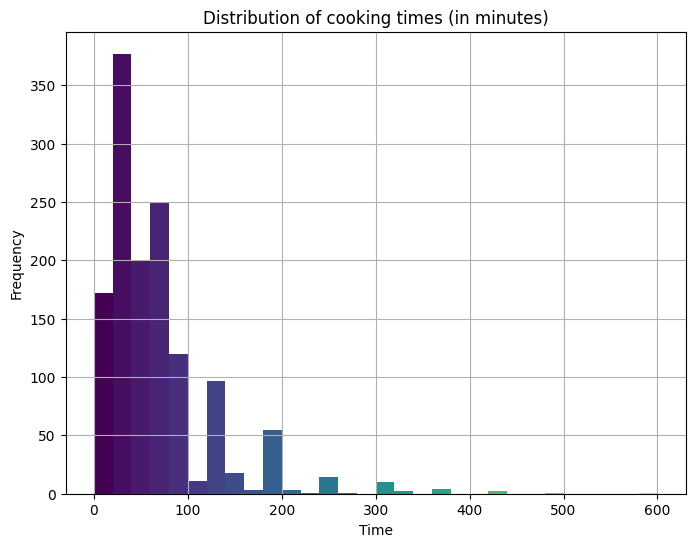

In [ ]:
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(df.time_in_minutes, bins=30)
for i, patch in enumerate(patches):
    patch.set_facecolor(plt.cm.viridis(i / len(patches)))
plt.title('Distribution of cooking times (in minutes)')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### This histogram displays the distribution of cooking times (in minutes). The distribution is multimodal, meaning it has several peaks, rather than a single dominant peak. There are noticeable clusters of recipes around 20 minutes, 40 minutes, and 60 minutes, suggesting these are common cooking times. Beyond 60 minutes, the frequency drops significantly, indicating that recipes with longer cooking times are less frequent in the dataset. The overall distribution shows a rightward skew, with a longer tail extending to longer cooking times, but the multiple peaks make it more complex than a simple right-skewed unimodal distribution.

In [ ]:
df

,recipe,author,ingredients,portions,time,savings,likes,dislikes,time_in_minutes
0,Брауни (brownie),Anastasia Sheveleva,6,6,40 минут,27871,3158,260,40
1,Сырники из творога,Алексей Скобелев,5,2,30 минут,27791,3044,310,30
2,Спагетти карбонара со сливками,Алексей Зимин,10,4,20 минут,23808,2493,245,20
3,Классическая шарлотка,Татьяна,6,12,50 минут,20833,2098,252,50
4,Лазанья классическая с мясом,Maria Chumakovskaya,8,6,40 минут,21169,1743,180,40
...,...,...,...,...,...,...,...,...,...
1394,Рождественское полено,Алексей Зимин,13,6,50 минут,735,6,3,50
1395,Спагетти болоньезе,Еда,17,8,2 часа,709,32,4,120
1396,Дьявольские яйца со вкусом карбонары,Еда,8,10,20 минут,729,19,2,20
1398,Тартар из авокадо с икрой воблы,Еда,4,1,5 минут,11,1,0,5


As we want to find the ideal recipe it is better not to include recipes with a lot of ingredient and with a small number of ingredients.

In [ ]:
df = df[(df['time_in_minutes'] > lower_bound) & (df['time_in_minutes'] < upper_bound)]
df

,recipe,author,ingredients,portions,time,savings,likes,dislikes,time_in_minutes
0,Брауни (brownie),Anastasia Sheveleva,6,6,40 минут,27871,3158,260,40
1,Сырники из творога,Алексей Скобелев,5,2,30 минут,27791,3044,310,30
2,Спагетти карбонара со сливками,Алексей Зимин,10,4,20 минут,23808,2493,245,20
3,Классическая шарлотка,Татьяна,6,12,50 минут,20833,2098,252,50
4,Лазанья классическая с мясом,Maria Chumakovskaya,8,6,40 минут,21169,1743,180,40
...,...,...,...,...,...,...,...,...,...
1394,Рождественское полено,Алексей Зимин,13,6,50 минут,735,6,3,50
1395,Спагетти болоньезе,Еда,17,8,2 часа,709,32,4,120
1396,Дьявольские яйца со вкусом карбонары,Еда,8,10,20 минут,729,19,2,20
1398,Тартар из авокадо с икрой воблы,Еда,4,1,5 минут,11,1,0,5


At the end we have <b> 1244 </b> rows.

<h2> Step 2: Creating new features </h2>

In [ ]:
import calendar

''' Categorize cooking time into 'быстрый', 'средний', and 'долгий' (fast, medium, long)
   bins: Defines the intervals for categorization
      0-30 minutes: 'быстрый'
      30-60 minutes: 'средний'
       60+ minutes: 'долгий' '''

df['time_category'] = pd.cut(df['time_in_minutes'], bins=[0, 30, 60, float('inf')], labels=['fast', 'medium', 'long'], right=False)

''' Calculate a popularity metric based on likes, dislikes, and savings
     Likes increase popularity.
     Dislikes decrease popularity.
     Savings contribute half as much to popularity as likes/dislikes.  This could be adjusted based on the data and its meaning '''

df['Popularity'] = df['likes'] - df['dislikes'] + 0.5 * df['savings']

''' Calculate recipe complexity using the natural logarithm of the number of ingredients.
   - This transforms the number of ingredients into a more manageable scale, reducing the impact of outliers (recipes with many ingredients).
   - Assumes 'ingredients' column contains the count of ingredients per recipe.  A log transformation is suitable if ingredient counts are skewed
   (common in culinary data) '''

df['recipe_complexity'] = np.log(df['ingredients'])


C:\Users\Радима\AppData\Local\Temp\ipykernel_2088\241646087.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_category'] = pd.cut(df['time_in_minutes'], bins=[0, 30, 60, float('inf')], labels=['fast', 'medium', 'long'], right=False)
C:\Users\Радима\AppData\Local\Temp\ipykernel_2088\241646087.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Popularity'] = df['likes'] - df['dislikes'] + 0.5 * df['savings']
C:\Users\Радима\AppData\Local\Temp\ipykernel_2088\241646087.py:23: SettingWithCopyWar

In [ ]:
df

,recipe,author,ingredients,portions,time,savings,likes,dislikes,time_in_minutes,time_category,Popularity,recipe_complexity
0,Брауни (brownie),Anastasia Sheveleva,6,6,40 минут,27871,3158,260,40,medium,16833.5,1.791759
1,Сырники из творога,Алексей Скобелев,5,2,30 минут,27791,3044,310,30,medium,16629.5,1.609438
2,Спагетти карбонара со сливками,Алексей Зимин,10,4,20 минут,23808,2493,245,20,fast,14152.0,2.302585
3,Классическая шарлотка,Татьяна,6,12,50 минут,20833,2098,252,50,medium,12262.5,1.791759
4,Лазанья классическая с мясом,Maria Chumakovskaya,8,6,40 минут,21169,1743,180,40,medium,12147.5,2.079442
...,...,...,...,...,...,...,...,...,...,...,...,...
1394,Рождественское полено,Алексей Зимин,13,6,50 минут,735,6,3,50,medium,370.5,2.564949
1395,Спагетти болоньезе,Еда,17,8,2 часа,709,32,4,120,long,382.5,2.833213
1396,Дьявольские яйца со вкусом карбонары,Еда,8,10,20 минут,729,19,2,20,fast,381.5,2.079442
1398,Тартар из авокадо с икрой воблы,Еда,4,1,5 минут,11,1,0,5,fast,6.5,1.386294


<h2> Steps 3 and 4: Intelligence data analysis and visualization </h2>

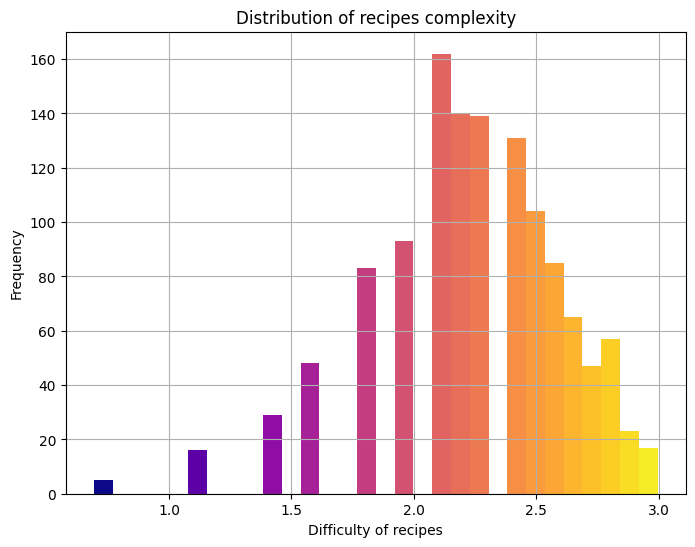

In [ ]:
import matplotlib.cm as cm # Import the colormap module

plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(df['recipe_complexity'], bins=30)
colormap = cm.plasma  # Example: 'plasma', 'viridis', 'magma', 'inferno', 'cividis'
for i, patch in enumerate(patches):
    color = colormap(i / len(patches))
    patch.set_facecolor(color)
plt.title('Distribution of recipes complexity')
plt.xlabel('Difficulty of recipes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### The histogram above shows the `distribution of recipe complexity`, calculated as the natural logarithm of the number of ingredients.

##### The distribution appears to be roughly unimodal, with a peak around a value of approximately 2. There is a right skew indicating a few recipes with a significantly higher number of complexity than the majority.


##### Let's look at our variables now and create a `correlation matrix`:

                   ingredients  portions   savings     likes  dislikes  \
ingredients           1.000000  0.033115 -0.072002 -0.075824 -0.094476   
portions              0.033115  1.000000 -0.017686 -0.008348 -0.010045   
savings              -0.072002 -0.017686  1.000000  0.945110  0.912125   
likes                -0.075824 -0.008348  0.945110  1.000000  0.956669   
dislikes             -0.094476 -0.010045  0.912125  0.956669  1.000000   
time_in_minutes       0.208248  0.369029 -0.079488 -0.061298 -0.063365   
Popularity           -0.072623 -0.016510  0.999003  0.958668  0.922671   
recipe_complexity     0.965205  0.036879 -0.053872 -0.062917 -0.081725   

                   time_in_minutes  Popularity  recipe_complexity  
ingredients               0.208248   -0.072623           0.965205  
portions                  0.369029   -0.016510           0.036879  
savings                  -0.079488    0.999003          -0.053872  
likes                    -0.061298    0.958668          -0.06

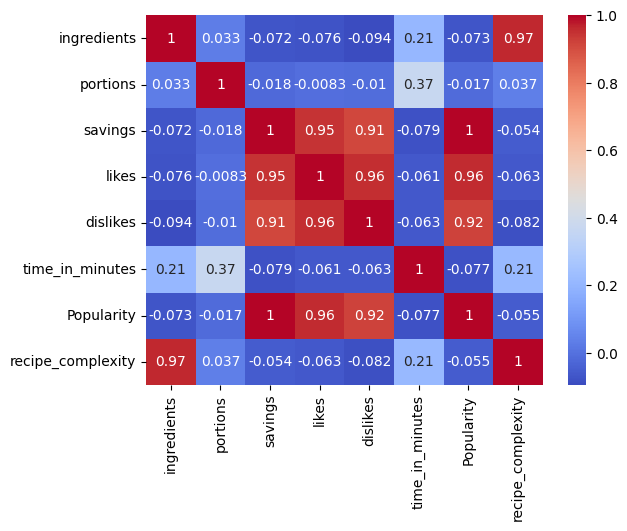

In [ ]:
df_subset = df.drop(['recipe', 'author', 'time_category', 'time'], axis=1)
correlation_matrix = df_subset.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

<u> From the correlation matrix we can see that: </u>
1) Number of ingredients and portions, minutes for cooking negatively correlate with savings, likes,dislikes - suppose that people prefer not really complex recipes
2) Number of saved recipes correlate positively with number of likes and dislikes - suppose that there is a category of popular recipes that have a lot of likes and dislikes
3) Number of ingredients and portions correlate positively with cooking time - more complex recipes require much more time

##### <b>Plot: Connection between Likes and Savings

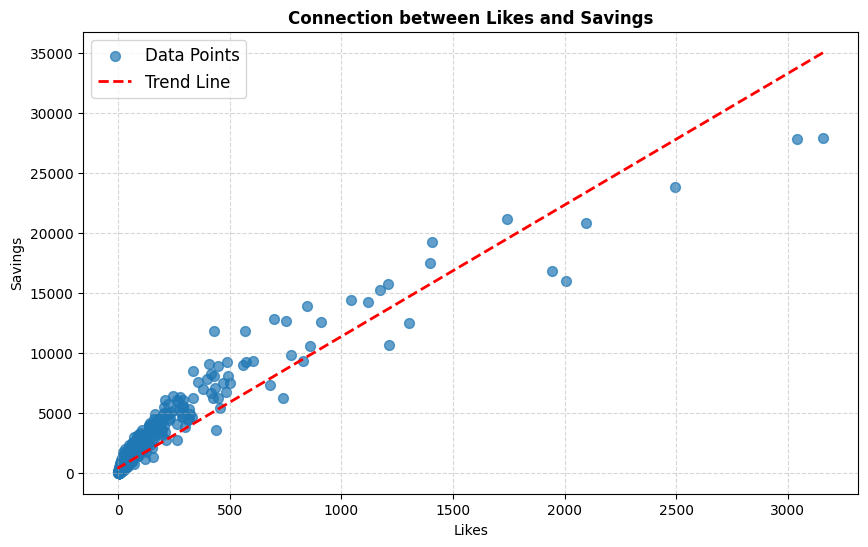

In [ ]:
z = np.polyfit(df['likes'], df['savings'], 1)
p = np.poly1d(z)

plt.figure(figsize=(10, 6))
plt.scatter(df['likes'], df['savings'], label='Data Points', s=50, alpha=0.7)
plt.plot(df['likes'], p(df['likes']), "r--", linewidth=2, label='Trend Line')
plt.title('Connection between Likes and Savings', fontweight='bold')
plt.xlabel('Likes')
plt.ylabel('Savings')

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12, loc='best')
plt.show()

##### The graph shows a positive correlation between likes and savings. A trend line indicates that higher likes generally correspond to higher savings, but with significant scatter suggesting other influencing factors.

##### <b> Plot: Connection between Dislikes and Savings

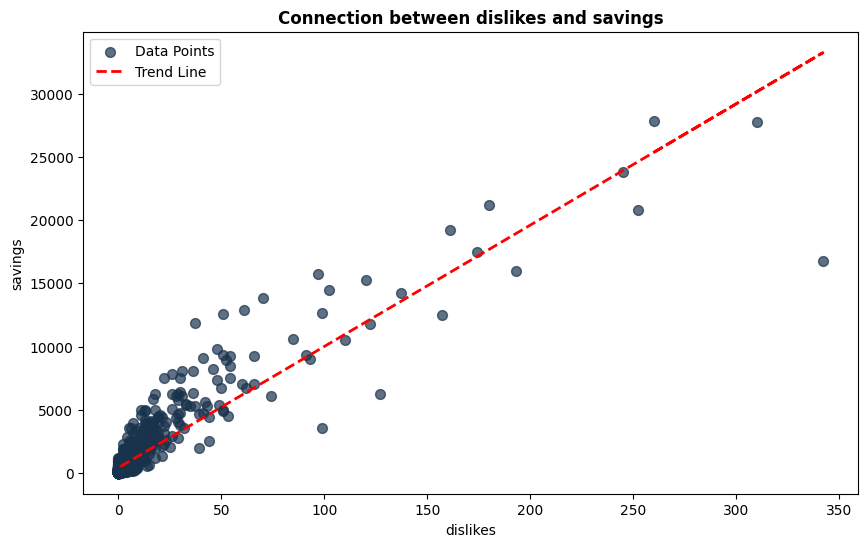

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df.dislikes, df.savings, label='Data Points', s=50, alpha=0.7, color=(0.1, 0.2, 0.3))

z = np.polyfit(df['dislikes'], df['savings'], 1)
p = np.poly1d(z)

plt.title('Connection between dislikes and savings', fontweight='bold')
plt.plot(df['dislikes'], p(df['dislikes']), "r--", linewidth=2, label='Trend Line')  # 'r--' is for a red dashed line
plt.xlabel('dislikes')
plt.ylabel('savings')
plt.legend()
plt.show()

##### The scatter plot illustrates a positive correlation between dislikes and savings, showing that as dislikes increase, the amount of saved recipes tend to increase. A trend line highlights this general upward trend. However, data points exhibit some dispersion around the trend line, indicating other factors may influence savings.

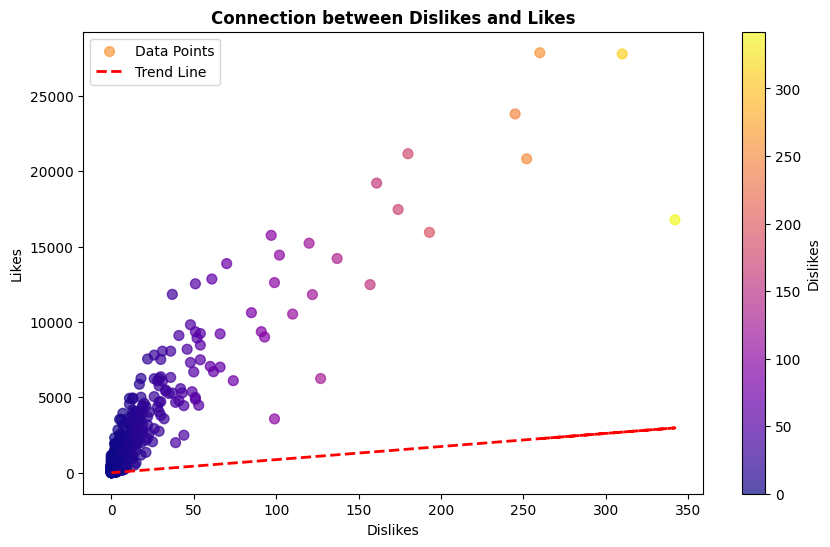

In [ ]:
z = np.polyfit(df['dislikes'], df['likes'], 1)
p = np.poly1d(z)

plt.figure(figsize=(10, 6))
cmap = cm.plasma
plt.scatter(df.dislikes, df.savings, label='Data Points', s=50, alpha=0.7, c=df['dislikes'], cmap=cmap)

plt.title('Connection between Dislikes and Likes', fontweight='bold')
plt.plot(df['dislikes'], p(df['dislikes']), "r--", linewidth=2, label='Trend Line')
plt.xlabel('Dislikes')
plt.ylabel('Likes')
plt.legend()
plt.colorbar(label='Dislikes')
plt.show()

##### The scatter plot shows a weak positive correlation between dislikes and likes, indicated by a slightly upward-sloping trend line. Point color intensity represents the number of dislikes, revealing a higher concentration of data points with fewer dislikes. The overall relationship suggests that while an increase in dislikes might be associated with a slight increase in likes, the correlation is not strong.

#####  In this part we are going to compare the main descriptive statistics between our tables

##### - for "middle" time category

In [ ]:
dff_new = df[df['time_category'] == 'medium']
dff_new.describe().round()
dff_new.round()

,recipe,author,ingredients,portions,time,savings,likes,dislikes,time_in_minutes,time_category,Popularity,recipe_complexity
0,Брауни (brownie),Anastasia Sheveleva,6,6,40 минут,27871,3158,260,40,medium,16834.0,2.0
1,Сырники из творога,Алексей Скобелев,5,2,30 минут,27791,3044,310,30,medium,16630.0,2.0
3,Классическая шарлотка,Татьяна,6,12,50 минут,20833,2098,252,50,medium,12262.0,2.0
4,Лазанья классическая с мясом,Maria Chumakovskaya,8,6,40 минут,21169,1743,180,40,medium,12148.0,2.0
5,Курица «Пикассо»,naomi,15,4,45 минут,19220,1406,161,45,medium,10855.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1384,Куриная грудка в микроволновой печи,Еда,9,4,30 минут,12,2,0,30,medium,8.0,2.0
1385,Гречневая лапша с уткой и кунжутом,Еда,13,2,30 минут,11,1,0,30,medium,6.0,3.0
1386,Суп с курицей тандури и кокосовыми сливками,Еда,16,4,30 минут,11,3,0,30,medium,8.0,3.0
1391,Котлеты из креветок и трески,Еда,14,4,45 минут,11,2,0,45,medium,8.0,3.0


##### - for "fast" time category

In [ ]:
dff_new2 = df[df['time_category'] == 'fast']
dff_new2.describe().round()

,ingredients,portions,savings,likes,dislikes,time_in_minutes,Popularity,recipe_complexity
count,334.0,334.0,334.0,334.0,334.0,334.0,334.0,334.0
mean,9.0,4.0,1151.0,58.0,7.0,17.0,626.0,2.0
std,3.0,2.0,2463.0,185.0,20.0,6.0,1388.0,0.0
min,2.0,1.0,11.0,0.0,0.0,0.0,6.0,1.0
25%,7.0,2.0,106.0,3.0,0.0,15.0,56.0,2.0
50%,9.0,4.0,331.0,9.0,2.0,15.0,174.0,2.0
75%,11.0,6.0,943.0,33.0,5.0,20.0,504.0,2.0
max,19.0,12.0,23808.0,2493.0,245.0,25.0,14152.0,3.0


##### - for "long" time category

In [ ]:
dff_new3 = df[df['time_category'] == 'long']
dff_new3.describe().round()

,ingredients,portions,savings,likes,dislikes,time_in_minutes,Popularity,recipe_complexity
count,496.0,496.0,496.0,496.0,496.0,496.0,496.0,496.0
mean,11.0,7.0,760.0,37.0,4.0,83.0,413.0,2.0
std,3.0,2.0,1727.0,113.0,13.0,26.0,961.0,0.0
min,2.0,1.0,11.0,0.0,0.0,60.0,6.0,1.0
25%,9.0,4.0,49.0,3.0,0.0,60.0,28.0,2.0
50%,11.0,6.0,172.0,6.0,1.0,75.0,91.0,2.0
75%,13.0,8.0,662.0,21.0,3.0,100.0,355.0,3.0
max,20.0,12.0,17466.0,1399.0,174.0,150.0,9958.0,3.0


##### <b> We have found out that
##### 1) Savings' and likes' and dislikes' mean is the most for middle time group, lowest - long time category
##### 2) Savings' and likes' and dislikes' std the most for average group, lowest - long time category
##### So we can suppose that the most popular recipes are that one that refers to middle our fast time group

##### From the descriptive analysis we have decided to concentrate on dishes that require 'middle' or 'a little' amount of time.

In [ ]:
dff_new = df[df['time_category'] == 'medium']
dff_new

,recipe,author,ingredients,portions,time,savings,likes,dislikes,time_in_minutes,time_category,Popularity,recipe_complexity
0,Брауни (brownie),Anastasia Sheveleva,6,6,40 минут,27871,3158,260,40,medium,16833.5,1.791759
1,Сырники из творога,Алексей Скобелев,5,2,30 минут,27791,3044,310,30,medium,16629.5,1.609438
3,Классическая шарлотка,Татьяна,6,12,50 минут,20833,2098,252,50,medium,12262.5,1.791759
4,Лазанья классическая с мясом,Maria Chumakovskaya,8,6,40 минут,21169,1743,180,40,medium,12147.5,2.079442
5,Курица «Пикассо»,naomi,15,4,45 минут,19220,1406,161,45,medium,10855.0,2.708050
...,...,...,...,...,...,...,...,...,...,...,...,...
1384,Куриная грудка в микроволновой печи,Еда,9,4,30 минут,12,2,0,30,medium,8.0,2.197225
1385,Гречневая лапша с уткой и кунжутом,Еда,13,2,30 минут,11,1,0,30,medium,6.5,2.564949
1386,Суп с курицей тандури и кокосовыми сливками,Еда,16,4,30 минут,11,3,0,30,medium,8.5,2.772589
1391,Котлеты из креветок и трески,Еда,14,4,45 минут,11,2,0,45,medium,7.5,2.639057


There are 413 rows in our new data frame

##### <b>Besides, we have decided that for identifing the perfect recipe we do not use a large number of ingridients
##### We have left only that part of the recipes that do not require many ingridients:
##### - for "middle" time category

In [ ]:
mean_complexity = dff_new['recipe_complexity'].mean()
dff_final = dff_new[dff_new['recipe_complexity'] < mean_complexity]
dff_final.round()

,recipe,author,ingredients,portions,time,savings,likes,dislikes,time_in_minutes,time_category,Popularity,recipe_complexity
0,Брауни (brownie),Anastasia Sheveleva,6,6,40 минут,27871,3158,260,40,medium,16834.0,2.0
1,Сырники из творога,Алексей Скобелев,5,2,30 минут,27791,3044,310,30,medium,16630.0,2.0
3,Классическая шарлотка,Татьяна,6,12,50 минут,20833,2098,252,50,medium,12262.0,2.0
4,Лазанья классическая с мясом,Maria Chumakovskaya,8,6,40 минут,21169,1743,180,40,medium,12148.0,2.0
7,Тонкие блины на молоке,Настасья Бондарева,6,4,40 минут,16787,1945,342,40,medium,9996.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1350,Вафельный торт,Еда,5,8,30 минут,13,4,0,30,medium,10.0,2.0
1356,Салат с ананасом,Еда,9,4,30 минут,13,2,0,30,medium,8.0,2.0
1377,Стейки денвер с кукурузой на гриле,Еда,9,2,30 минут,12,2,0,30,medium,8.0,2.0
1379,Маффины с булгуром,Екатерина Григорьева,8,12,35 минут,773,39,6,35,medium,420.0,2.0


There are 207 rows in our new data frame


##### - for "fast" time category

In [ ]:
mean_complexity2 = dff_new2['recipe_complexity'].mean()
dff_final2 = dff_new2[dff_new2['recipe_complexity'] < mean_complexity]
dff_final2.round()

,recipe,author,ingredients,portions,time,savings,likes,dislikes,time_in_minutes,time_category,Popularity,recipe_complexity
9,"Салат из красной фасоли с творожным сыром, кра...",Алексей Зимин,9,4,7 минут,15230,1174,120,7,fast,8669.0,2.0
14,Брускетта с помидорами,Алексей Зимин,8,4,10 минут,12536,909,51,10,fast,7126.0,2.0
21,Спагетти с чесноком и маслом,Алексей Зимин,8,4,15 минут,9360,605,91,15,fast,5194.0,2.0
24,Гуакамоле,Алексей Зимин,8,4,20 минут,9106,405,41,20,fast,4917.0,2.0
40,Настоящий греческий салат,Татьяна Задирака,9,3,10 минут,6263,333,29,10,fast,3436.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1366,Луковые кольца в пивном кляре,Еда,5,2,20 минут,13,1,0,20,fast,8.0,2.0
1381,Закуска из кальмаров и грибов,Еда,8,8,20 минут,12,2,0,20,fast,8.0,2.0
1389,Майонезный песто,Алексей Зимин,7,6,15 минут,773,21,9,15,fast,398.0,2.0
1396,Дьявольские яйца со вкусом карбонары,Еда,8,10,20 минут,729,19,2,20,fast,382.0,2.0


There are 193 rows in our new data frame

##### <b>Now we want to find this ideal recipes in our final tables

We are going to find the most 'popular' recipe that require 'middle' amount of time and not a huge number of ingridients

In [ ]:
maxpop = dff_final['Popularity'].max()
dff_final[dff_final['Popularity'] == maxpop]['recipe']

0    Брауни (brownie)
Name: recipe, dtype: object

#### So we found out that the ideal recipe is <b> Brownie


Then we are going to find the most 'popular' recipe that refers to 'fast' time category and requires not a huge number of ingridients

In [ ]:
maxpop = dff_new2['Popularity'].max()
dff_new2[dff_new2['Popularity'] == maxpop]['recipe']

2    Спагетти карбонара со сливками
Name: recipe, dtype: object

##### So we found out that the ideal fast recipe is <b> Spagetti Carbonara


##### In this part we would like to find out our top 50 recipes:
##### - for "middle" time category

In [ ]:
df_popular = dff_final.sort_values(by=['Popularity'], ascending=[False]).head(50)
df_popular

,recipe,author,ingredients,portions,time,savings,likes,dislikes,time_in_minutes,time_category,Popularity,recipe_complexity
0,Брауни (brownie),Anastasia Sheveleva,6,6,40 минут,27871,3158,260,40,medium,16833.5,1.791759
1,Сырники из творога,Алексей Скобелев,5,2,30 минут,27791,3044,310,30,medium,16629.5,1.609438
3,Классическая шарлотка,Татьяна,6,12,50 минут,20833,2098,252,50,medium,12262.5,1.791759
4,Лазанья классическая с мясом,Maria Chumakovskaya,8,6,40 минут,21169,1743,180,40,medium,12147.5,2.079442
7,Тонкие блины на молоке,Настасья Бондарева,6,4,40 минут,16787,1945,342,40,medium,9996.5,1.791759
1060,Цветаевский яблочный пирог,Тамара Дьякова,8,4,30 минут,15951,2006,193,30,medium,9788.5,2.079442
8,Азу по-татарски,Галина Хафизова,7,4,30 минут,15752,1210,97,30,medium,8989.0,1.945910
12,Оякодон (японский омлет с рисом и курицей),Андрей Терехин,7,2,30 минут,14440,1043,102,30,medium,8161.0,1.945910
10,Творожный кекс с яйцами,Юлия Вержбицкая,8,4,30 минут,14214,1121,137,30,medium,8091.0,2.079442
15,Пирог «Зебра»,Александра Яценко,7,8,30 минут,12483,1301,157,30,medium,7385.5,1.945910


##### - for "fast" time category

In [ ]:
df_popular2 = dff_final2.sort_values(by=['Popularity'], ascending=[False]).head(50)
df_popular2

,recipe,author,ingredients,portions,time,savings,likes,dislikes,time_in_minutes,time_category,Popularity,recipe_complexity
9,"Салат из красной фасоли с творожным сыром, кра...",Алексей Зимин,9,4,7 минут,15230,1174,120,7,fast,8669.0,2.197225
14,Брускетта с помидорами,Алексей Зимин,8,4,10 минут,12536,909,51,10,fast,7126.0,2.079442
685,Завтрак для ленивых,Таня Пёникер,5,3,15 минут,11819,569,122,15,fast,6356.5,1.609438
21,Спагетти с чесноком и маслом,Алексей Зимин,8,4,15 минут,9360,605,91,15,fast,5194.0,2.079442
24,Гуакамоле,Алексей Зимин,8,4,20 минут,9106,405,41,20,fast,4917.0,2.079442
762,Салат с обжаренными томатами,Алексей Зимин,7,4,10 минут,8937,448,52,10,fast,4864.5,1.945910
875,Французские тосты с яблоками,Алексей Зимин,9,1,10 минут,6239,447,26,10,fast,3540.5,2.197225
40,Настоящий греческий салат,Татьяна Задирака,9,3,10 минут,6263,333,29,10,fast,3435.5,2.197225
41,Имбирное печенье с ванильным сахаром,Алексей Зимин,9,8,20 минут,6323,275,36,20,fast,3400.5,2.197225
48,Треска с помидорами,Алексей Зимин,7,6,15 минут,5295,316,43,15,fast,2920.5,1.945910


#### In order to better analyze these two tables we have made the following graphics:

Now we can find out the best authors for our list of the best recipes:

##### - for "middle" time category

<Axes: ylabel='proportion'>

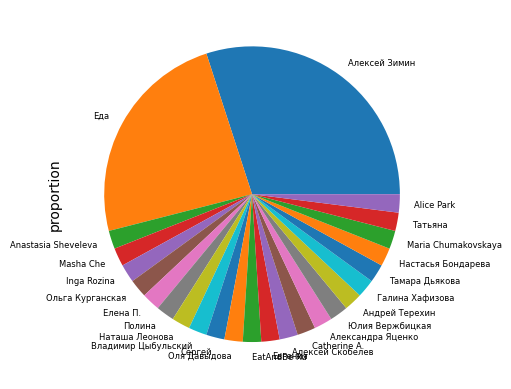

In [ ]:
df_popular['author'].value_counts(normalize=True).plot(kind='pie', fontsize=6)

We can see that there are two main leaders: Еда  and Алексей Зимин

##### - for "fast" time category

<Axes: ylabel='proportion'>

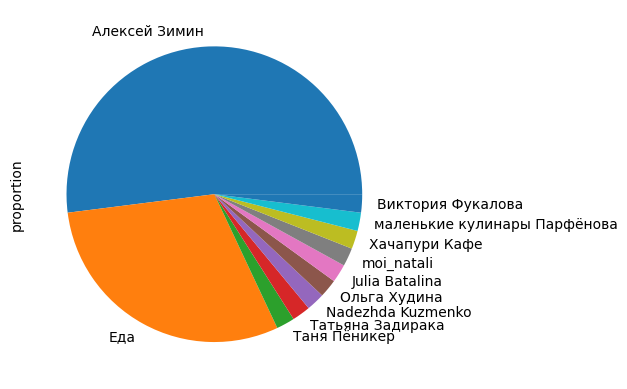

In [ ]:
df_popular2['author'].value_counts(normalize=True).plot(kind='pie')

For the "fast" time category two main leaders remain the same although their share among the recipes is even bigger.

### Analysis of dependencies:

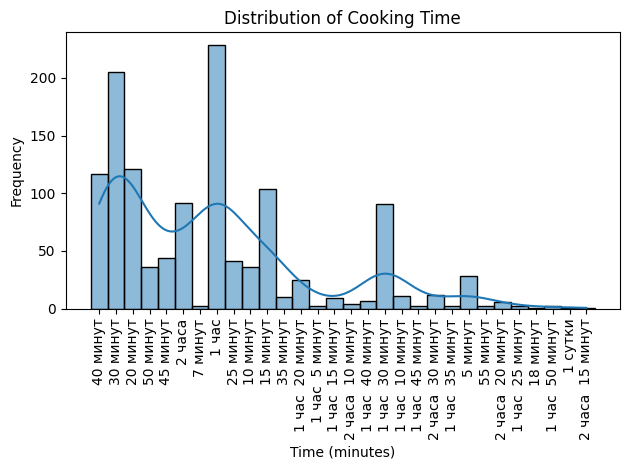

In [ ]:
# Distribution of recipes by the time of cooking
sns.histplot(df['time'], bins=30, kde=True)
plt.title('Distribution of Cooking Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout() # Adjust layout to prevent clipping
plt.show()

The data appear multimodal, suggesting several distinct clusters of cooking times. There are peaks around 25-30 minutes, and a smaller peak around 40 minutes, which are likely the more popular cooking times. Longer cooking times are far less frequent, with a general decrease in frequency as cooking time increases. The density curve suggests that the overall distribution is likely skewed left.

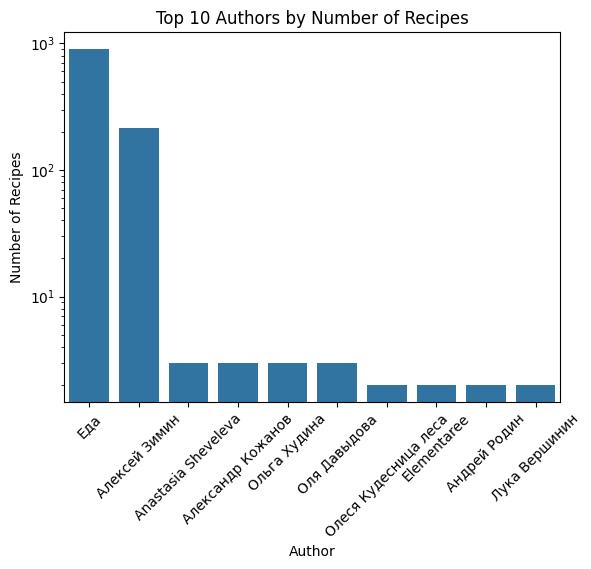

In [ ]:
# Top-10 authors by number of recipes
top_authors = df['author'].value_counts().head(10)
sns.barplot(x=top_authors.index, y=top_authors.values, log = True)
plt.title('Top 10 Authors by Number of Recipes')
plt.xlabel('Author')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=45)
plt.show()

This visualization effectively highlights the disproportionate contribution of Еда and Алексей Зимин to the dataset. For other authors the amounts of recipes are distributed more or less evenly.

Co-authors of the work: Radima Sultygova, Anastasia Minaeva